Koen Verbruggen 459785 and Leon Bremer 637885

<head>
<title>Python Solow model - Koen and Leon</title>
</head>

#Numerical Simulation assignment 3 - Python
##How do savings affect income in the Solow model?

[Koen Verbruggen](http://koenverbruggen.github.io/cv/) and [Leon Bremer](http://leonbremer.github.io/cv/index.html)

April 14, 2016

For the third assignment of the Method course Numerical Simulation we will analyze the Solow model from macroeconomic theory by using the Python programming language. As for many well-known economic theories, people have already tried to program them in Python and therefore we would like to mention [this page](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/sgu3luzs1aypui3/Solow2.ipynb) as a reference for our work.

##Motivation

We are both very much interested in economic growth and we have analyzed the Solow model to a great extend in the Bachelor course Macroeconomics 4 and in the Master course Growth and Regional Development. As this model has been very important in the economic literature, it is highly relevant to analyze it. Furthermore the formulas used in the model are very suitable for an analysis in Python.

To have a specific aim for this assignment, we will try to answer the following question:

"How do savings affect income per capita in the Solow model?"

We will explain the underlying intuition of the [Solow model](https://en.wikipedia.org/wiki/Solow%E2%80%93Swan_model). We will show the formulas in the LaTeX typesetting and where possible we will visualize the formulas and results by creating (interactive) graphs.

The method applied is based on the calculation of a [steady state](#steadystate) and the presentation of graphs. To find out what effect savings can have on per capita income, we will perform a [sensitivity analysis](#sensitivity). Applying different savings rates to our model will give a feeling of its effect on income. Furthermore we will test our theory to [real data](#realdata) and we will [discuss](#discussion) our findings.

In [2]:
#Start with importing the packages.
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
import scipy.optimize
%matplotlib inline
%precision 4
from __future__ import division
import plotly


##The Solow model

The Solow model is based on a Cobb-Douglas production function
$$Y = (K)^\alpha (AL)^{1-\alpha}$$
where $Y$ is the economy's output, $K$ is the capital stock, $L$ is the amount of workers, $A$ is a measure for technology, and $\alpha$ is the income share of labor.

Furthermore it is assumed that people save a share of $s$ of their income, meaning that in total $S$ is saved and invested.
$$S=I=sY$$
At a rate of $s$ capital is accumulated, but at a rate of $\delta$ capital is also depreciated. So the change in the total capital stock can be calculated as
$$\Delta K = sY-\delta K$$.

###The intensive form

As there are three inputs in the Solow model ($A$, $K$, and $L$) it is useful to isolate the effective capital per capita. As one can imagine, income per capita might be higher when capital per capita is higher. Therefore the formulas will be rewritten per effective worker, meaning per $AL$. This results in the following key intensive form equations.
$$k = \frac{K}{AL}$$
$$y = \frac{Y}{AL} = (K)^\alpha (AL)^{1-\alpha} (AL)^{-1} = k^\alpha$$ 

###Steady state<a name="steadystate"></a>

In the Solow model, the economy moves towards its steady state. This steady state exists, due to two opposite forces, namely (1) investments in capital from peoples' savings $sy$ and (2) depreciation of the current capital stock per effective worker $(g+n+\delta)k$. These two opposite forces will bring the economy to the steady state where $sy = (g+n+\delta)k$, where $n$ is the population growth rate and $g$ is the growth rate of technological change.

As we have just seen that $y=k^\alpha$, we can rewrite the above equation and isolate the steady state level of $k$, which is denoted as $k^*$.

$$sy = (g+n+\delta)k$$
$$sk^\alpha = (g+n+\delta)k$$
$$k^(\alpha-1) = \frac{(g+n+\delta)}{s}$$
$$k^* = \frac{g+n+\delta}{s}^\frac{1}{\alpha-1}$$

##Estimation of the model

We will have to define the parameters of the Solow model in order to estimate the variables. We chose the parameters as they are most common in macroeconomic theory.

In [3]:
alpha = (1/3)
delta = 0.05
g = 0.02
n = 0.02
s = 0.25
kss = ((g+n+delta)/s)**(1/(alpha-1)) #kss = steady state capital stock per effective worker
yss = kss**alpha
syss = s*yss

We enter the three equations needed to show the steady state graphically. Using the mathplotlib package, we can then draw the three lines and show how the steady state looks like.

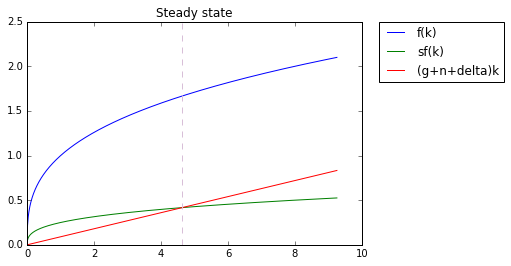

In [4]:
ks = np.arange(0, kss*2, 0.01); #Sets the range of the x-axis.
ys = ks**alpha #Make all lines a function of the x-axis variable ks.
ss = s*ys
gk = (g+n+delta)*ks
plt.plot(ks, ys, "b",label="f(k)")
plt.plot(ks, ss, "g", label="sf(k)")
plt.plot(ks, gk, "r", label="(g+n+delta)k")
plt.axvline(x=kss,color="thistle",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Steady state")

Besides visualizing the steady state, we can also use Python to calculate the steady state values of $y$, $k$, and $sy$ respectively.

In [5]:
print yss
print kss
print syss

1.66666666667
4.62962962963
0.416666666667


##Sensitivity analysis<a name="sensitivity"></a>

We have seen how the steady state values of the Solow model are calculated under the most common assumptions. Now we investigate what happens when we change the savings rate. Let us first increase the savings rate significantly up to 0.5, meaning that people save 50% of their disposable income.

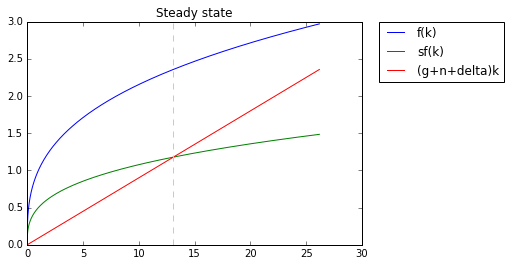

In [6]:
#Increasing the savings rate

s = 0.5
kss = ((g+n+delta)/s)**(1/(alpha-1))
yss = kss**alpha
syss = s*yss

ks = np.arange(0, kss*2, 0.01);
ys = ks**alpha
ss = s*ys
gk = (g+n+delta)*ks
plt.plot(ks, ys, "b",label="f(k)")
plt.plot(ks, ss, "g", label="sf(k)")
plt.plot(ks, gk, "r", label="(g+n+delta)k")
plt.axvline(x=kss,color="thistle",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Steady state")

In [7]:
print yss
print kss
print syss

2.35702260396
13.094570022
1.17851130198


What we see is that the higher savings causes the steady state income level to increase significantly, from 1.67 to 2.36. The economic intuition from the Solow model is as follows. Higher savings means that investment in capital is higher. As capital is one of the main inputs in this economy, more capital increases potential output. This investment in capital formation therefore increases steady state income levels. Noticeable is that the steady state capital level has to increase significantly (from 4.6 to 13.1) to realize the change in income level. This is due to the diminishing marginal productivity of input factors. Increasing just one input factor will have a positive, but diminishing effect on output.

Let's now analyze what happens when the savings rate is decreased to 10%.

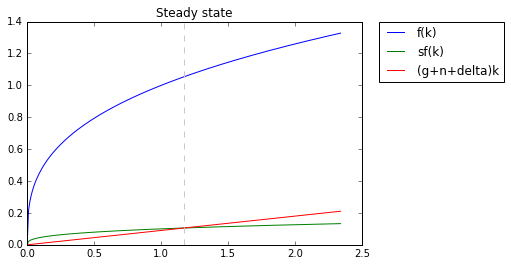

In [8]:
#Decreasing the savings rate

s = 0.1
kss = ((g+n+delta)/s)**(1/(alpha-1))
yss = kss**alpha
syss = s*yss

ks = np.arange(0, kss*2, 0.01);
ys = ks**alpha
ss = s*ys
gk = (g+n+delta)*ks
plt.plot(ks, ys, "b",label="f(k)")
plt.plot(ks, ss, "g", label="sf(k)")
plt.plot(ks, gk, "r", label="(g+n+delta)k")
plt.axvline(x=kss,color="thistle",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Steady state")

In [9]:
print yss
print kss
print syss

1.05409255339
1.17121394821
0.105409255339


The plotted lines takes the same shape as in the previous two graphs. Steady state income now is 1.05 (cf. 1.67 in the 'normal' state). As expected from the theory, a decrease in the savings rate has a negative impact on capital accumulation, capital stock, and potential output.

##Real data<a name="realdata"></a>

To test whether the model is supported by real life observations, we will present a graph depicting the savings rate and the income level of countries. The Solow model predicts that countries with a high savings rate have higher per capita income. Therefore we collected data from 30 OECD countries on their [savings rate](https://data.oecd.org/hha/household-savings.htm) and their [GDP per capita](https://data.oecd.org/gdp/gross-domestic-product-gdp.htm) for the year 2005.

Surprising is that the two variables do not show a clear positive relationship, but rather show a weak negative relationship instead.

In [10]:
import plotly.tools as tls
tls.embed('https://plot.ly/~leonbremer/2')

Furthermore we can test whether savings rates might have an impact on GDP growth rates. Through the dynamics of the Solow model we expect that higher savings rates cause a shift towards a larger capital stock and a higher GDP level. If countries are therefore in a transition towards their steady state, we would expect that higher savings rates would positively affect GDP growth figures. Therefore in the graph below, we test this theory for data from [The World Bank](http://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG) on 153 countries. This graph seems to weakly support our theory. The fitted line is slightly upward sloping, indicating a positive relationship between savings and income growth. It should be noticed that this relationship is weak, as the scatter shows the large variance in observations.

In [11]:
import plotly.tools as tls
tls.embed('https://plot.ly/~KoenVerbruggen/21')

##Discussion<a name="discussion"></a>

We have analyzed the Solow model and performed a sensitivity analysis on the savings rate. It turns out that within the model higher savings rates are predicted to increase income levels per capita. We have shown this through the calculations of the steady state values and through the visualization of the Solow model in three graphs.

Furthermore we tested the Solow model on real data collected from the [OECD](http://www.oecd.org/) and [The World Bank](http://www.worldbank.org/). We were not able to convincingly support the theory with the data we collected. From the data it showed that there are weak negative and weak positive relationships between the savings rate and the income level and the income growth rate respectively.

A potential problem for this analysis is that we assumed that all savings are invested in capital. This could only be the case for closed economies. Nowadays economies are strongly interconnected and international investment flows are very common. This could lead to a gap between savings and investments. Countries could actually invest heavily in capital if there are many foreign investments, while domestic savings rates are low.

###Technological change as the only source of long term growth

To finish this excercise, we would like to discuss the shortcomings of the Solow model and the alternative economic theories available.

[Above](#steadystate) we showed how the steady state was calculated. We have also shown that in this steady state output per effective worker is constant, so it is not possible to have perpetual economic growth. We have not yet calculated the most interesting variable for economic prosperity, which is income per worker (or per person) $\frac{Y}{L}$. This variable can easily be derived from the $y$ variable, as $\frac{Y}{L} = Ay$.

As we have seen that the growth rate of $y$ is zero in the long run, income per worker will grow at $g$. Since this rate $g$ is not explained within the model, the Solow model is considered to be an exogenous growth model. More recently economics has focussed on the explanation for technological change within the models. These newer models are part of the [endogenous growth theories](http://www.investopedia.com/terms/e/endogenousgrowththeory.asp).